In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\sarav\Documents\EDA\datasets\eurusd\eurusd_m10.csv")

In [3]:
del df['Unnamed: 0']
del df['tick_volume']
del df['spread']

In [4]:
df_original = df

del df['open']
del df['high']
del df['low']

In [5]:
df['SMA10'] = df['close'].rolling(10).mean()
df['SMA20'] = df['close'].rolling(20).mean()

In [6]:
df.isna().sum()

time            0
close           0
real_volume     0
SMA10           9
SMA20          19
dtype: int64

In [7]:
df['SMA10'].head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     1.294356
10    1.294352
11    1.294250
12    1.294276
13    1.294238
14    1.294274
15    1.294275
16    1.294258
17    1.294216
18    1.294180
19    1.294120
Name: SMA10, dtype: float64

In [8]:
df['SMA20'].head(30)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19    1.294238
20    1.294189
21    1.294113
22    1.294085
23    1.294010
24    1.293991
25    1.293938
26    1.293878
27    1.293796
28    1.293732
29    1.293654
Name: SMA20, dtype: float64

In [9]:
df

,time,close,real_volume,SMA10,SMA20
0,2012-01-02 00:00:00,1.29454,0,NaN,NaN
1,2012-01-02 00:10:00,1.29512,0,NaN,NaN
2,2012-01-02 00:20:00,1.29419,0,NaN,NaN
3,2012-01-02 00:30:00,1.29459,0,NaN,NaN
4,2012-01-02 00:40:00,1.29386,0,NaN,NaN
...,...,...,...,...,...
370398,2021-12-30 23:20:00,1.13269,0,1.132486,1.131708
370399,2021-12-30 23:30:00,1.13243,0,1.132457,1.131787
370400,2021-12-30 23:40:00,1.13257,0,1.132446,1.131880
370401,2021-12-30 23:50:00,1.13257,0,1.132443,1.131978


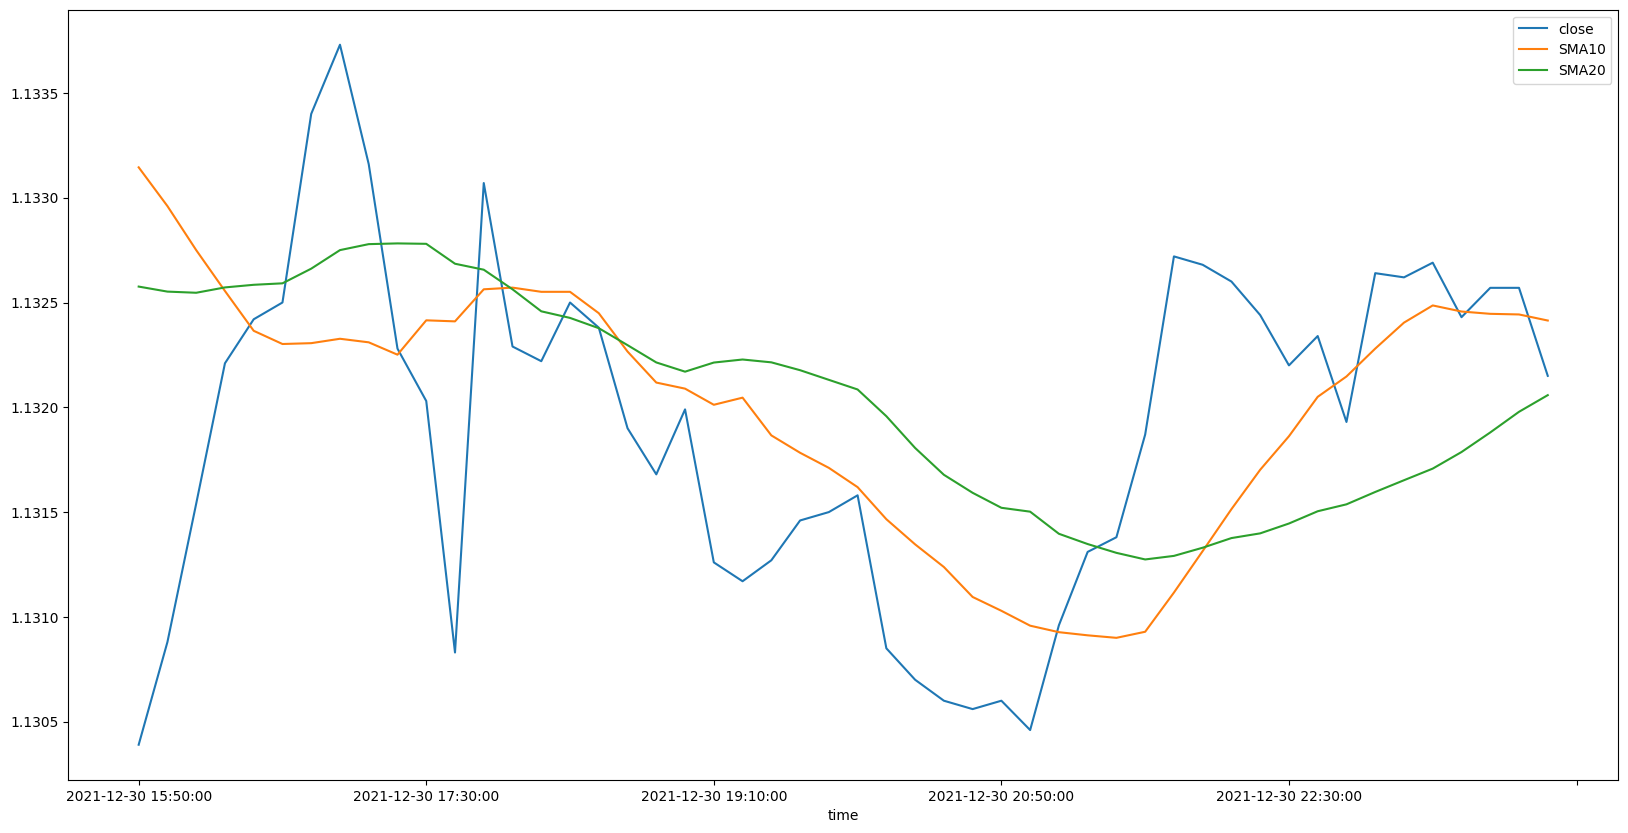

In [10]:
df[['close','SMA10','SMA20','time']].tail(50).plot(figsize=(20,10),x='time')
plt.show()

In [11]:
def signal(raw):
    
    if raw['SMA10'] > raw['SMA20']:
        return 1
    elif raw['SMA10']  < raw['SMA20']:
        return 0
    else :
        return np.NaN

df['Signal'] = df.apply(signal,axis=1)

In [12]:
df['Signal'].value_counts()

1.0    185716
0.0    184510
Name: Signal, dtype: int64

In [13]:
df['Signal-Filtered'] = df['Signal'][df['Signal'] != df['Signal'].shift()]

In [14]:
df['Signal-Price(BUY)'] = df['close'][df['Signal-Filtered'] == 1]
df['Signal-Price(SELL)'] = df['close'][df['Signal-Filtered'] == 0]

In [15]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
370353,2021-12-30 15:50:00,1.13039,0,1.133145,1.132576,1.0,NaN,NaN,NaN
370354,2021-12-30 16:00:00,1.13088,0,1.132960,1.132552,1.0,NaN,NaN,NaN
370355,2021-12-30 16:10:00,1.13154,0,1.132750,1.132547,1.0,NaN,NaN,NaN
370356,2021-12-30 16:20:00,1.13221,0,1.132555,1.132572,0.0,0.0,NaN,1.13221
370357,2021-12-30 16:30:00,1.13242,0,1.132365,1.132585,0.0,NaN,NaN,NaN
370358,2021-12-30 16:40:00,1.13250,0,1.132302,1.132591,0.0,NaN,NaN,NaN
370359,2021-12-30 16:50:00,1.13340,0,1.132306,1.132661,0.0,NaN,NaN,NaN
370360,2021-12-30 17:00:00,1.13373,0,1.132327,1.132750,0.0,NaN,NaN,NaN
370361,2021-12-30 17:10:00,1.13316,0,1.132310,1.132779,0.0,NaN,NaN,NaN
370362,2021-12-30 17:20:00,1.13228,0,1.132251,1.132782,0.0,NaN,NaN,NaN


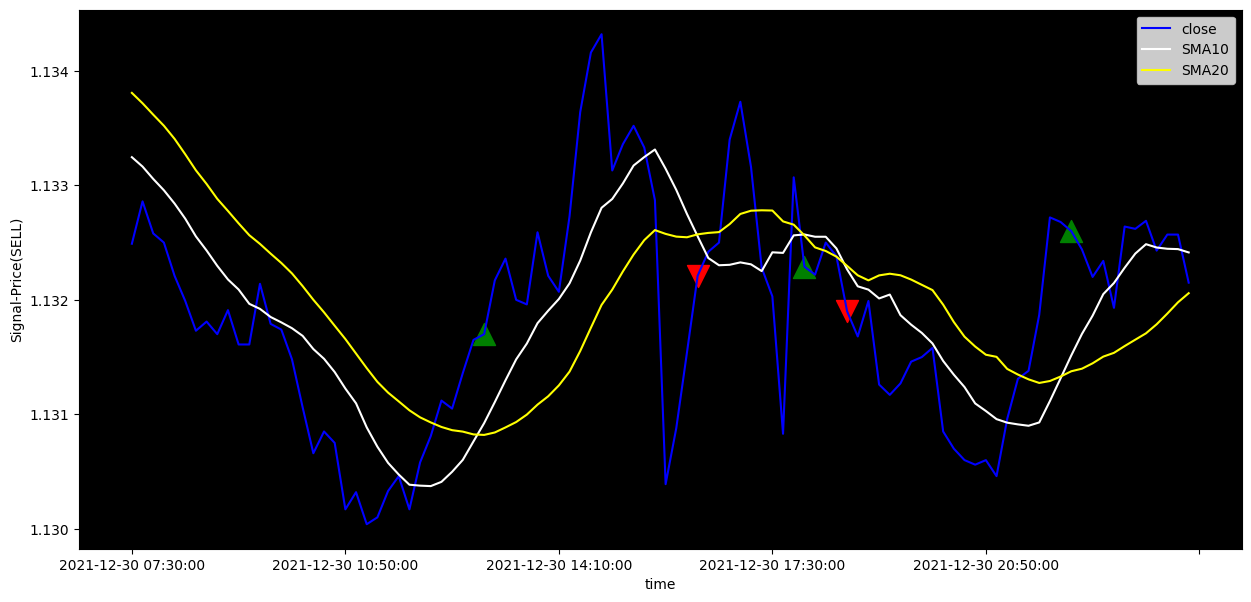

In [16]:
ax = df[['close','SMA10','SMA20','time']].tail(100).plot(x='time',legend=True,figsize=(15, 7),color=['blue','white','yellow'])
df[['time','Signal-Price(BUY)']].tail(100).plot(x='time',y='Signal-Price(BUY)',kind='scatter',ax=ax,marker='^',secondary_y=True,color='green',legend='True',s=250)
df[['time','Signal-Price(SELL)']].tail(100).plot(x='time',y='Signal-Price(SELL)',kind='scatter',ax=ax,marker='v',secondary_y=True,color='red',legend='True',s=250)
ax.set_facecolor('black')
plt.show()

In [17]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
370353,2021-12-30 15:50:00,1.13039,0,1.133145,1.132576,1.0,NaN,NaN,NaN
370354,2021-12-30 16:00:00,1.13088,0,1.132960,1.132552,1.0,NaN,NaN,NaN
370355,2021-12-30 16:10:00,1.13154,0,1.132750,1.132547,1.0,NaN,NaN,NaN
370356,2021-12-30 16:20:00,1.13221,0,1.132555,1.132572,0.0,0.0,NaN,1.13221
370357,2021-12-30 16:30:00,1.13242,0,1.132365,1.132585,0.0,NaN,NaN,NaN
370358,2021-12-30 16:40:00,1.13250,0,1.132302,1.132591,0.0,NaN,NaN,NaN
370359,2021-12-30 16:50:00,1.13340,0,1.132306,1.132661,0.0,NaN,NaN,NaN
370360,2021-12-30 17:00:00,1.13373,0,1.132327,1.132750,0.0,NaN,NaN,NaN
370361,2021-12-30 17:10:00,1.13316,0,1.132310,1.132779,0.0,NaN,NaN,NaN
370362,2021-12-30 17:20:00,1.13228,0,1.132251,1.132782,0.0,NaN,NaN,NaN


In [18]:
# x = df.index()
# while x != 0 :
#     x = x-1

df['Profit'] = np.NaN

In [19]:
initial_balance = np.NaN
for index, row in df.iterrows():
    if row['Signal-Filtered'] == 1:  # Buy signal
        if initial_balance is not None:
            profit = initial_balance - row['close']
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']
    elif row['Signal-Filtered'] == 0:  # Sell signal
        if initial_balance is not None:
            profit = row['close'] - initial_balance
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']

In [20]:
df[(df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)]

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit
19,2012-01-02 03:10:00,1.29351,0,1.294120,1.294238,0.0,0.0,NaN,1.29351,NaN
44,2012-01-02 07:20:00,1.29291,0,1.292798,1.292739,1.0,1.0,1.29291,NaN,0.00060
74,2012-01-02 12:20:00,1.29467,0,1.294892,1.294973,0.0,0.0,NaN,1.29467,0.00176
117,2012-01-02 19:30:00,1.29281,0,1.292446,1.292399,1.0,1.0,1.29281,NaN,0.00186
130,2012-01-02 21:40:00,1.29270,0,1.292541,1.292546,0.0,0.0,NaN,1.29270,-0.00011
...,...,...,...,...,...,...,...,...,...,...
370336,2021-12-30 13:00:00,1.13170,0,1.130923,1.130820,1.0,1.0,1.13170,NaN,0.00287
370356,2021-12-30 16:20:00,1.13221,0,1.132555,1.132572,0.0,0.0,NaN,1.13221,0.00051
370366,2021-12-30 18:00:00,1.13229,0,1.132571,1.132563,1.0,1.0,1.13229,NaN,-0.00008
370370,2021-12-30 18:40:00,1.13190,0,1.132266,1.132297,0.0,0.0,NaN,1.13190,-0.00039


In [21]:
df['Category'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else np.NaN))

In [22]:
df[((df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)) & (df['Category'] == 'Profit')]

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
44,2012-01-02 07:20:00,1.29291,0,1.292798,1.292739,1.0,1.0,1.29291,NaN,0.00060,Profit
74,2012-01-02 12:20:00,1.29467,0,1.294892,1.294973,0.0,0.0,NaN,1.29467,0.00176,Profit
117,2012-01-02 19:30:00,1.29281,0,1.292446,1.292399,1.0,1.0,1.29281,NaN,0.00186,Profit
178,2012-01-03 05:40:00,1.29770,0,1.297614,1.297665,0.0,0.0,NaN,1.29770,0.00439,Profit
205,2012-01-03 10:10:00,1.29903,0,1.298648,1.298755,0.0,0.0,NaN,1.29903,0.00111,Profit
...,...,...,...,...,...,...,...,...,...,...,...
370230,2021-12-29 19:20:00,1.13424,0,1.134393,1.134520,0.0,0.0,NaN,1.13424,0.00454,Profit
370244,2021-12-29 21:40:00,1.13419,0,1.134004,1.133998,1.0,1.0,1.13419,NaN,0.00005,Profit
370279,2021-12-30 03:30:00,1.13457,0,1.134988,1.135007,0.0,0.0,NaN,1.13457,0.00038,Profit
370336,2021-12-30 13:00:00,1.13170,0,1.130923,1.130820,1.0,1.0,1.13170,NaN,0.00287,Profit


In [23]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
370353,2021-12-30 15:50:00,1.13039,0,1.133145,1.132576,1.0,NaN,NaN,NaN,NaN,NaN
370354,2021-12-30 16:00:00,1.13088,0,1.132960,1.132552,1.0,NaN,NaN,NaN,NaN,NaN
370355,2021-12-30 16:10:00,1.13154,0,1.132750,1.132547,1.0,NaN,NaN,NaN,NaN,NaN
370356,2021-12-30 16:20:00,1.13221,0,1.132555,1.132572,0.0,0.0,NaN,1.13221,0.00051,Profit
370357,2021-12-30 16:30:00,1.13242,0,1.132365,1.132585,0.0,NaN,NaN,NaN,NaN,NaN
370358,2021-12-30 16:40:00,1.13250,0,1.132302,1.132591,0.0,NaN,NaN,NaN,NaN,NaN
370359,2021-12-30 16:50:00,1.13340,0,1.132306,1.132661,0.0,NaN,NaN,NaN,NaN,NaN
370360,2021-12-30 17:00:00,1.13373,0,1.132327,1.132750,0.0,NaN,NaN,NaN,NaN,NaN
370361,2021-12-30 17:10:00,1.13316,0,1.132310,1.132779,0.0,NaN,NaN,NaN,NaN,NaN
370362,2021-12-30 17:20:00,1.13228,0,1.132251,1.132782,0.0,NaN,NaN,NaN,NaN,NaN


In [24]:
df['Filter-by-profit(BUY)'] = df['Signal-Price(BUY)'][df['Category'] == 'Profit']
df['Filter-by-profit(SELL)'] = df['Signal-Price(SELL)'][df['Category'] == 'Profit']